# Integrated-learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
X, y = datasets.make_moons(n_samples=2000, noise=0.3, random_state=42)

In [3]:
X.shape

(2000, 2)

In [4]:
y.shape

(2000,)

绘制出我们的图形

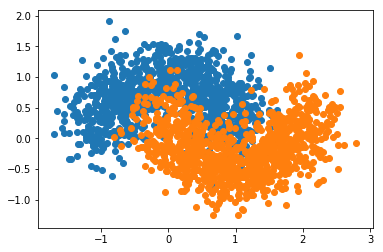

In [5]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

将数据集分为训练数据集和测试数据集

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

# 1. 本地编写集成学习方法

(1) 用逻辑回归对数据进行分类

In [7]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.832

(2) 用SVM算法对数据进行分类

In [8]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9

(3) 用DecisionTree 对数据进行分类


In [9]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.88

下面，我们集成三种算法的“意见”,即对于一个样本，如果两种或两种以上的算法将其划分为“1”，其才属于“1”这一类;如果两种或两种以上的算法将其划分为“0”，其才属于“0”这一类;


In [10]:
predict1 = log_reg.predict(X_test)
predict2 = svc.predict(X_test)
predict3 = dt_clf.predict(X_test)
predict = np.array((predict1 + predict2 + predict3) >=2, dtype = 'int')

打印预测的10个元素，直观的看一下

In [11]:
print(predict1[50:60])
print(predict2[50:60])
print(predict3[50:60])
print(predict[50:60])

[1 1 1 1 0 0 0 1 1 0]
[1 1 1 1 0 0 0 1 1 0]
[1 1 1 1 0 0 0 1 1 0]
[1 1 1 1 0 0 0 1 1 0]


调用 sklearn.metrics.accuracy_score 函数看一下集成三个算法后， 预测的predict的准确度

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.898

# 调用sklearn.ensemble.VotingClassifier 直接集成三种算法

In [13]:
from sklearn.ensemble import VotingClassifier
vot_clf = VotingClassifier(estimators=[('log_reg', LogisticRegression()),
                            ('svm_clf', SVC()),
                            ('dt_clf', DecisionTreeClassifier())
], voting='hard')
vot_clf.fit(X_train, y_train)
vot_clf.score(X_test, y_test)

/home/crystal/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.896

与我们本地自己实现的集成效果是一致的